# IMPORT LIBRARY

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

# MEMBACA GAMBAR -> CONVERT KE RGB

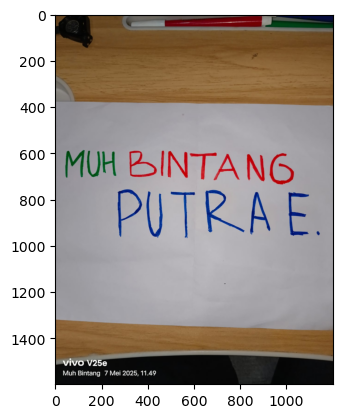

In [12]:
img = cv2.imread('color_name.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [14]:
(baris, kolom)= img.shape[:2]

# KONTRAS CITRA

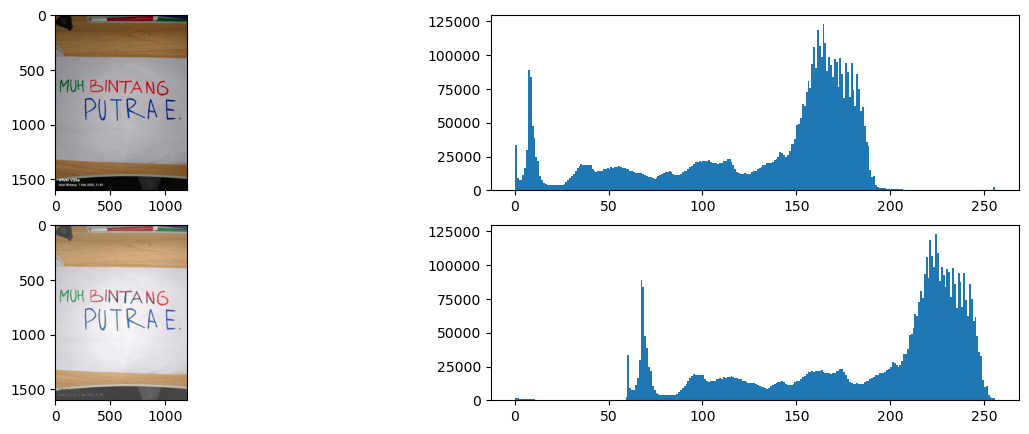

In [23]:
beta = 60
citra_cerah =np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range(kolom):
        gyx = img[x,y] + beta
        citra_cerah[x,y] = gyx
        
citra_cerah = citra_cerah.astype(np.uint8)

fig, axs = plt.subplots(2,2, figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(),256,[0,256])
axs[1,0].imshow(citra_cerah)
axs[1,1].hist(citra_cerah.ravel(),256,[0,256])
plt.show()

# DETEKSI WARNA CITRA

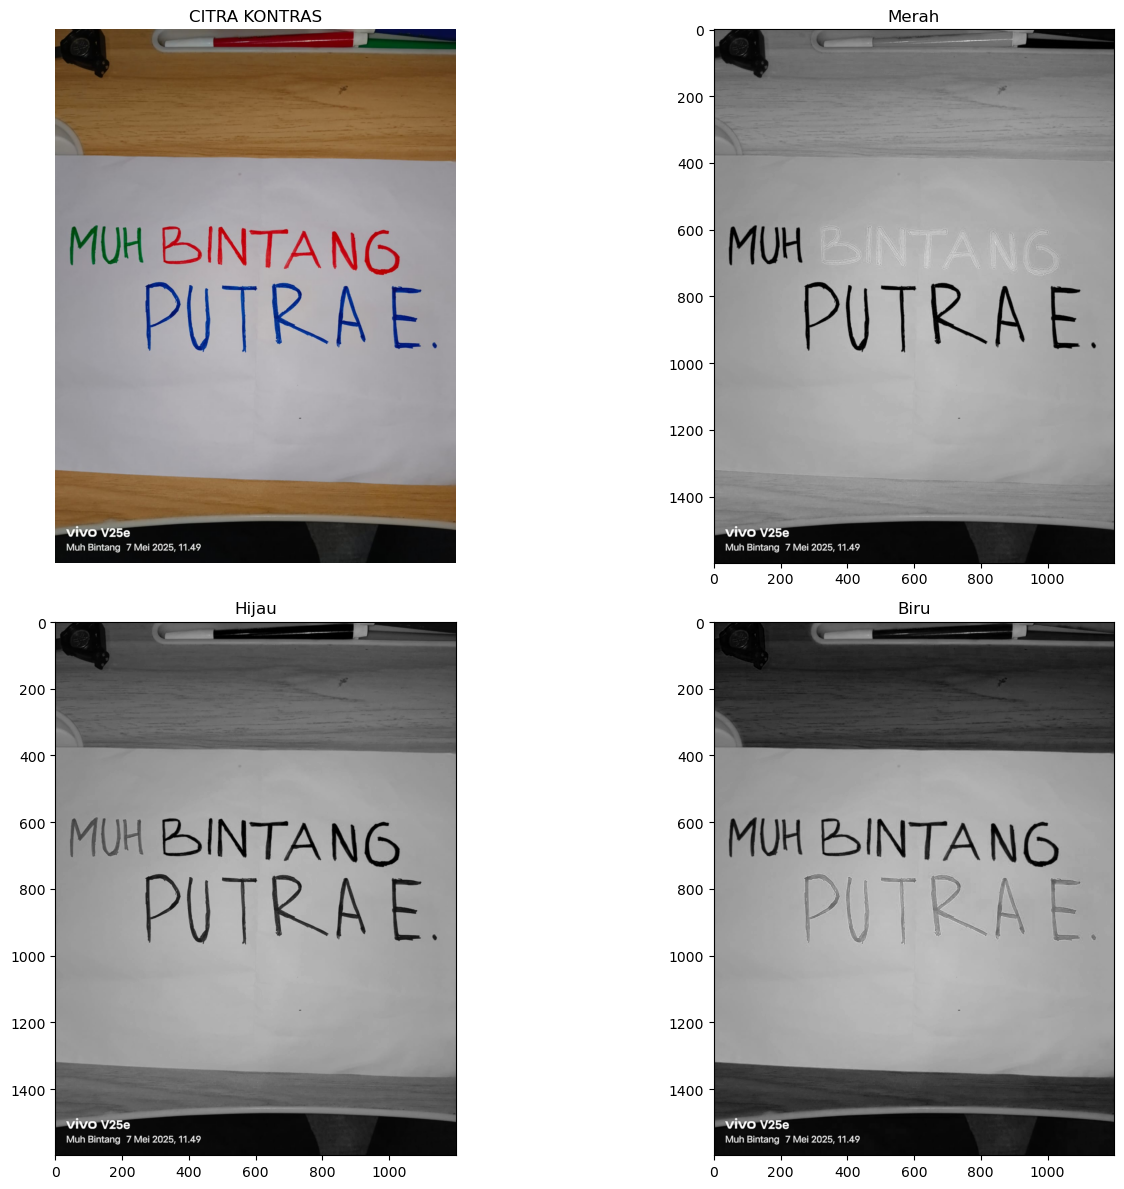

In [37]:
r = img[:, :, 0] 
g = img[:, :, 1] 
b = img[:, :, 2]

f, axes = plt.subplots(2, 2, figsize=(15, 12)) 

# Citra Kontras
axes[0, 0].set_title('CITRA KONTRAS')
axes[0, 0].imshow(img)
axes[0, 0].axis('off')

# Warna Merah
axes[0, 1].set_title('Merah')
axes[0, 1].imshow(r, cmap='gray')
axes[0, 1].axis('on')

# Warna Hijau
axes[1, 0].set_title('Hijau')
axes[1, 0].imshow(g, cmap='gray')
axes[1, 0].axis('on')

# Warna Biru
axes[1, 1].set_title('Biru')
axes[1, 1].imshow(b, cmap='gray')
axes[1, 1].axis('on')

plt.tight_layout()
plt.show()

# HISTOGRAM GAMBAR

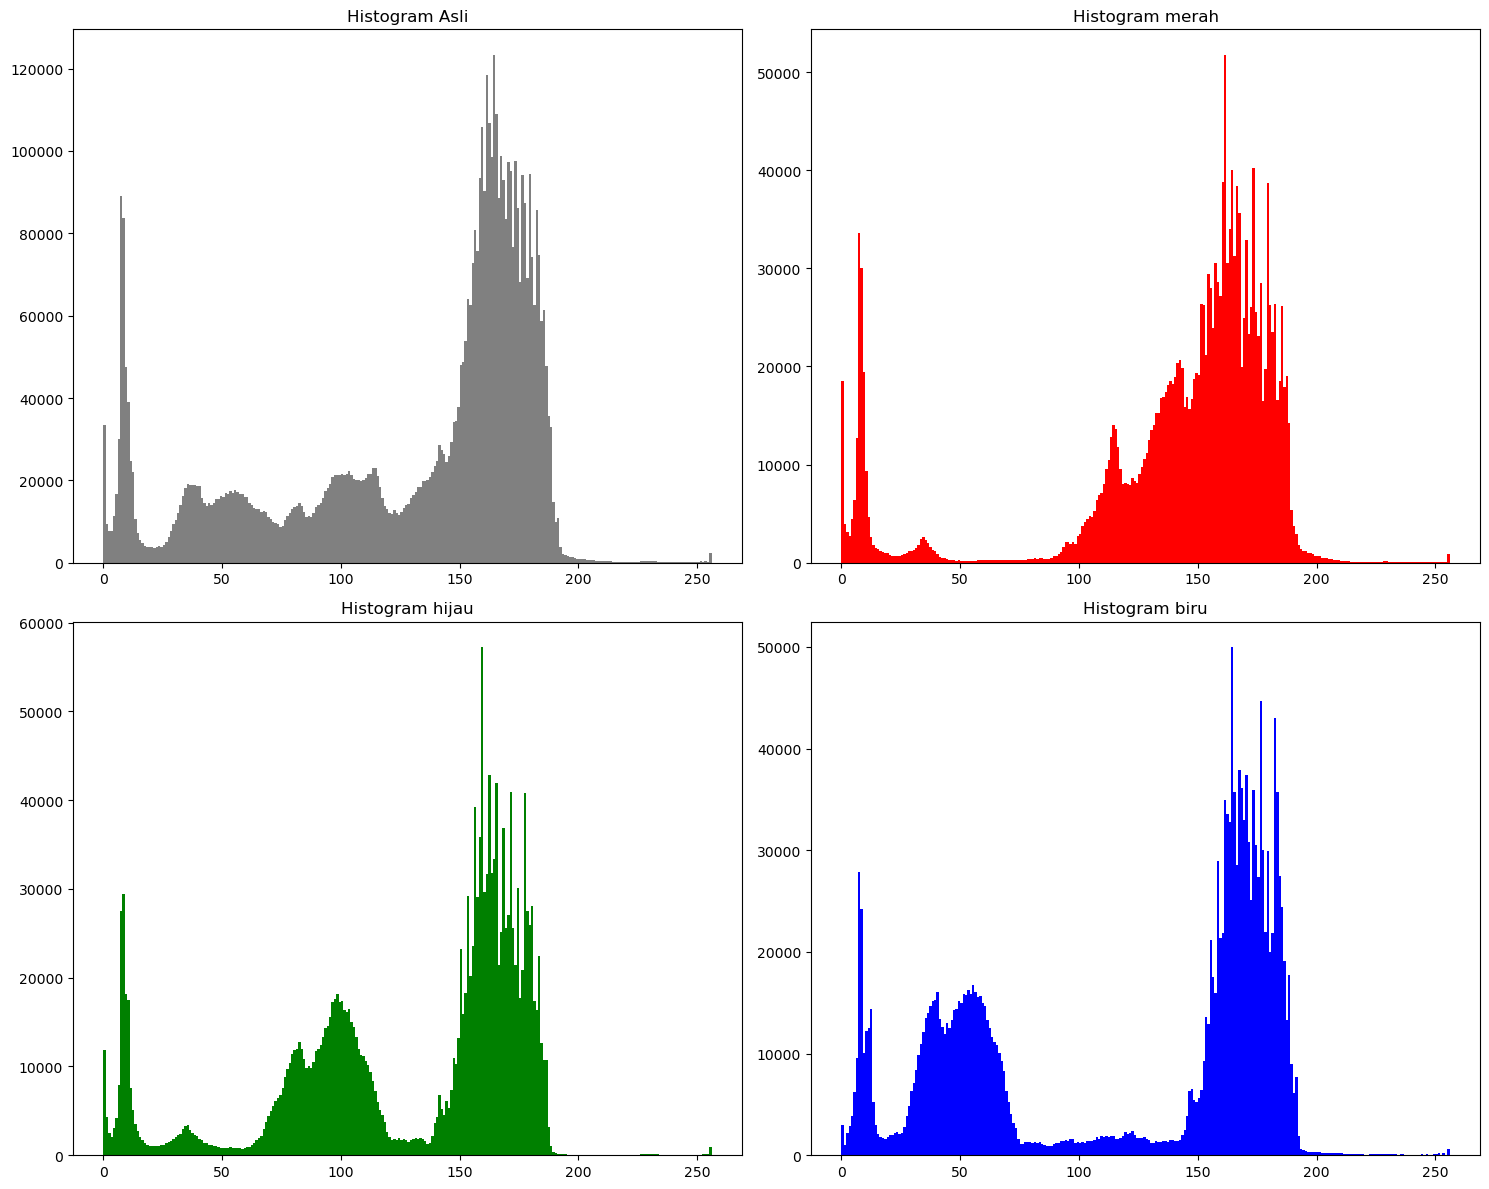

In [51]:
f, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].set_title('Histogram Asli')
axes[0, 0].hist(img.flatten(), bins=256, range=[0,256], color='gray')

axes[0, 1].set_title('Histogram merah')
axes[0, 1].hist(r.flatten(), bins=256, range=[0,256], color='r')

axes[1, 0].set_title('Histogram hijau')
axes[1, 0].hist(g.flatten(), bins=256, range=[0,256], color='g')

axes[1, 1].set_title('Histogram biru')
axes[1, 1].hist(b.flatten(), bins=256, range=[0,256], color='b')

plt.tight_layout()
plt.show()

# AMBANG BATAS BIRU

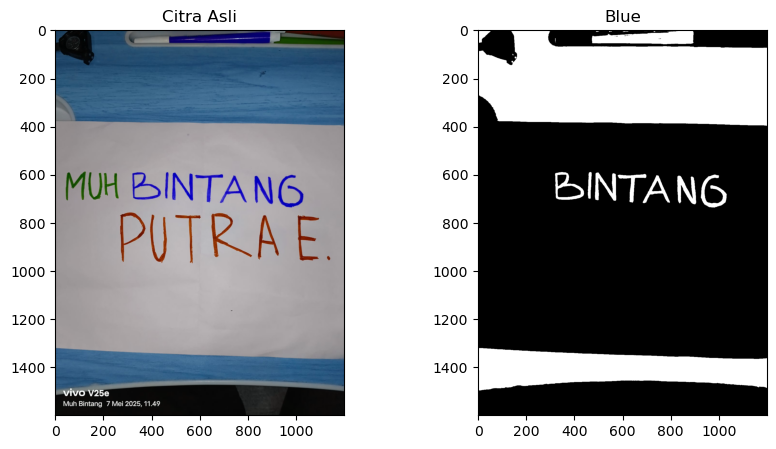

In [68]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

mask = cv2.inRange(hsv, lower_blue, upper_blue)

hasil = cv2.bitwise_and(img, img, mask=mask)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')

axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Blue')

plt.show()

# AMBANG BATAS MERAH-BIRU

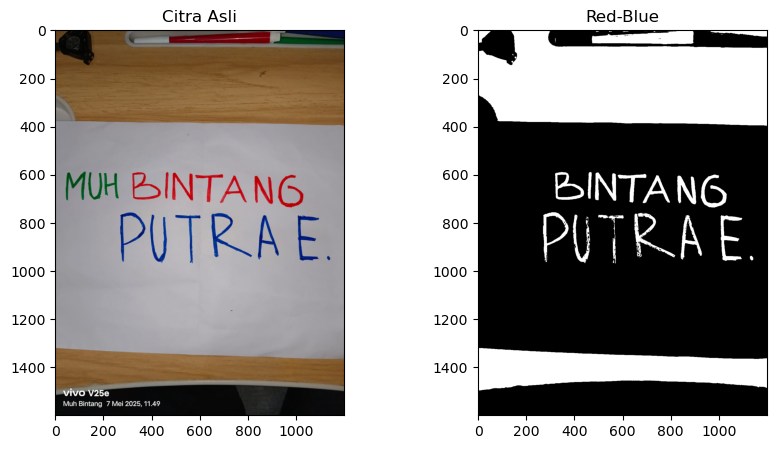

In [84]:
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)

mask_combined1 = cv2.bitwise_or(mask_blue, mask_red1)
mask_combined1 = cv2.bitwise_or(mask_combined1, mask_red2)

hasil = cv2.bitwise_and(img, img, mask=mask_combined1)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img)
axs[0].set_title('Citra Asli')

axs[1].imshow(mask_combined1, cmap='gray')
axs[1].set_title('Red-Blue')

plt.show()

# AMBANG BATAS RGB

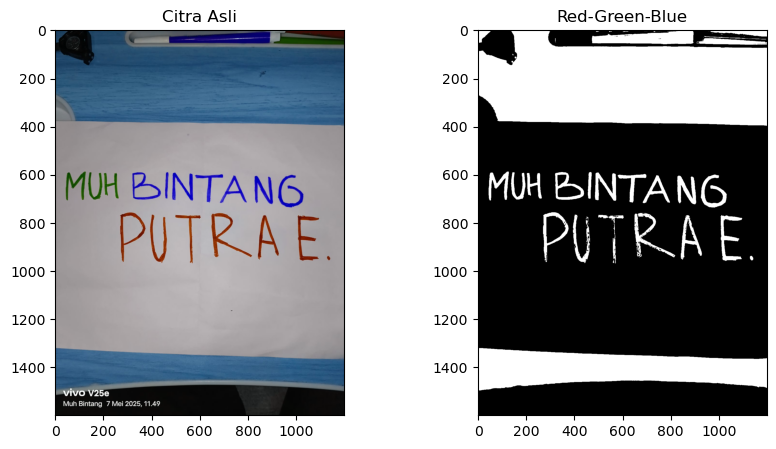

In [86]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)



lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_green = cv2.inRange(hsv, lower_green, upper_green)

mask_combined2 = cv2.bitwise_or(mask_blue, mask_red1)
mask_combined2 = cv2.bitwise_or(mask_combined2, mask_red2)
mask_combined2 = cv2.bitwise_or(mask_combined2, mask_green)

hasil = cv2.bitwise_and(img, img, mask=mask_combined2)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')

axs[1].imshow(mask_combined2, cmap='gray')
axs[1].set_title('Red-Green-Blue')

plt.show()


# AMBANG BATAS NONE

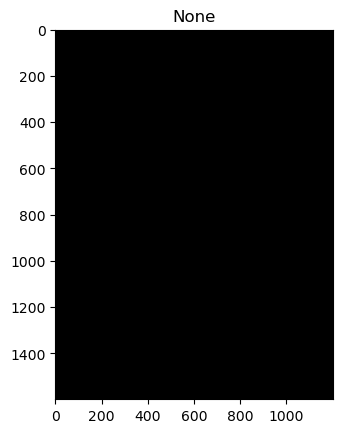

In [80]:
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('on')
    plt.show()

hsv_image = cv2.imread('color_name.jpg', cv2.IMREAD_COLOR)
hsv_image = cv2.cvtColor(hsv_image, cv2.COLOR_BGR2HSV)

lower_blue = np.array([100, 50, 50])   
upper_blue = np.array([130, 255, 255])

lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255]) 

lower_green = np.array([50, 50, 50])
upper_green = np.array([80, 255, 255])

blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

red_blue_mask = cv2.bitwise_or(red_mask1, red_mask2)
combined_mask = cv2.bitwise_or(blue_mask, cv2.bitwise_or(red_blue_mask, green_mask))

black_image = np.zeros_like(hsv_image, dtype=np.uint8)

black_detected_image = cv2.bitwise_and(black_image, black_image, mask=combined_mask)

display_image(black_detected_image, "None")

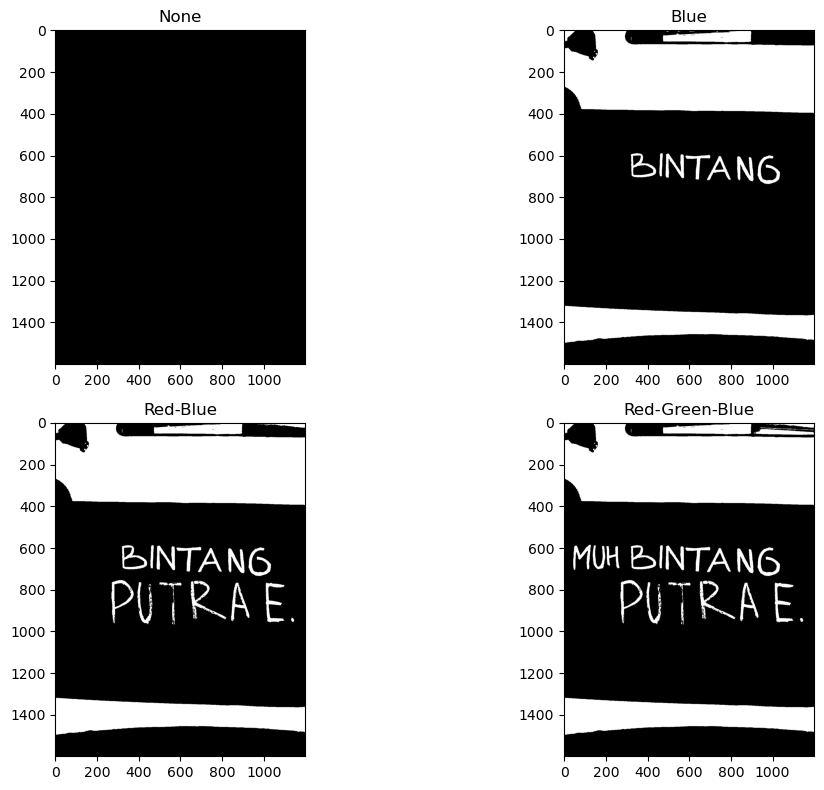

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].imshow(cv2.bitwise_and(black_image, black_image, mask=combined_mask))
axs[0, 0].set_title('None')

axs[0, 1].imshow(mask, cmap='gray')
axs[0, 1].set_title('Blue')

axs[1, 0].imshow(mask_combined1, cmap='gray')
axs[1, 0].set_title('Red-Blue')

axs[1, 1].imshow(mask_combined2, cmap='gray')
axs[1, 1].set_title('Red-Green-Blue')

for ax in axs.flat:
    ax.axis('on')

plt.tight_layout()
plt.show()